In [211]:
import os
import math
import json
import shutil

import numpy as np
import pandas as pd

PATH_TO_VAULTS = "C:/Users/mjkuo/Documents/MITES_Summer_ML/MLFP/Obsidian_Vaults"

### Creating New Folders and Files

Function for the creation of an Obsidian vault folder, Note markdown files, hidden .obsidian folder and associated JSONs

In [ ]:
def make_vault(vault_folder_path, vault_name):
  """  Creates a new Obsidian vault with the given name in the specified folder path.
  The vault will be empty except for the necessary Obsidian configuration files. """

  # make the vault folder if it does not exist

  VAULT_PATH = os.path.join(vault_folder_path, vault_name)
  os.makedirs(VAULT_PATH, exist_ok=True)


  # create the .obsidian folder
  OBSIDIAN_PATH = os.path.join(VAULT_PATH, ".obsidian")
  os.makedirs(OBSIDIAN_PATH, exist_ok=True)


  # create empty app and appearance JSON files
  app = open(os.path.join(OBSIDIAN_PATH, "app.json"), "w")
  app.write("{}")
  app.close()

  appearance = open(os.path.join(OBSIDIAN_PATH, "appearance.json"), "w")
  appearance.write("{}")
  appearance.close()

  # create community-plugins, core-plugins and graph JSON files
  community_plugins = open(os.path.join(OBSIDIAN_PATH, "community-plugins.json"), "w")
  community_plugins.write('["custom-node-size"]')
  community_plugins.close()

  core_plugins = open(os.path.join(OBSIDIAN_PATH, "core-plugins.json"), "w")
  core_plugins.write("""{
    "file-explorer": true,
    "global-search": true,
    "switcher": true,
    "graph": true,
    "backlink": true,
    "canvas": true,
    "outgoing-link": true,
    "tag-pane": true,
    "properties": false,
    "page-preview": true,
    "daily-notes": true,
    "templates": true,
    "note-composer": true,
    "command-palette": true,
    "slash-command": false,
    "editor-status": true,
    "bookmarks": true,
    "markdown-importer": false,
    "zk-prefixer": false,
    "random-note": false,
    "outline": true,
    "word-count": true,
    "slides": false,
    "audio-recorder": false,
    "workspaces": false,
    "file-recovery": true,
    "publish": false,
    "sync": true,
    "webviewer": false
  }""")
  core_plugins.close()

  # create graph JSON file
  # some special stuff happening here: need to insert tags based on color. 
  graph = open(os.path.join(OBSIDIAN_PATH, "graph.json"), "w")
  rgb_range = [65367, 4585534, 6352925, 7727104, 8839168, 
            9819904, 10735104, 11453696, 12106752, 12759552, 
            13346816, 13868544, 14390016, 14845696, 15366400, 
            15821312, 16145152, 16402432, 16593152, 16711680]
  color_groups_data = []
  for color in rgb_range:
    entry = f"""{{"query": "tag:#c{color}  ", "color": {{"a": 1, "rgb": {color}}}}}"""
    color_groups_data.append(entry)

  color_groups_string = ", ".join(color_groups_data)
  graph.write("""{
    "collapse-filter": true,
    "search": "",
    "showTags": false,
    "showAttachments": false,
    "hideUnresolved": false,
    "showOrphans": true,
    "collapse-color-groups": true,
    "colorGroups": [""" + color_groups_string + """],
    "collapse-display": true,
    "showArrow": false,
    "textFadeMultiplier": 0,
    "nodeSizeMultiplier": 1,
    "lineSizeMultiplier": 1,
    "collapse-forces": true,
    "centerStrength": 0.518713248970312,
    "repelStrength": 10,
    "linkStrength": 0.5,
    "linkDistance": 250,
    "scale": 1,
    "close": true
  }""")
  graph.close()

  # create workspace JSON file
  workspace = open(os.path.join(OBSIDIAN_PATH, "workspace.json"), "w")
  workspace.write("""{
    "main": {
      "id": "cbb9c879545e69b4",
      "type": "split",
      "children": [
        {
          "id": "aa8fb59897089ba8",
          "type": "tabs",
          "children": [
            {
              "id": "e966f3c79a49d080",
              "type": "leaf",
              "state": {
                "type": "markdown",
                "state": {
                  "file": "Welcome.md",
                  "mode": "source",
                  "source": false
                },
                "icon": "lucide-file",
                "title": "Welcome"
              }
            }
          ]
        },
        {
          "id": "f72c30fc7c49d2a3",
          "type": "tabs",
          "children": [
            {
              "id": "902828fe95ef58b1",
              "type": "leaf",
              "state": {
                "type": "graph",
                "state": {},
                "icon": "lucide-git-fork",
                "title": "Graph view"
              }
            }
          ]
        }
      ],
      "direction": "vertical"
    },
    "left": {
      "id": "4c75e1077ca0b1cc",
      "type": "split",
      "children": [
        {
          "id": "f53dd39974922010",
          "type": "tabs",
          "children": [
            {
              "id": "5ecb76458d76c080",
              "type": "leaf",
              "state": {
                "type": "file-explorer",
                "state": {
                  "sortOrder": "alphabetical",
                  "autoReveal": false
                },
                "icon": "lucide-folder-closed",
                "title": "Files"
              }
            },
            {
              "id": "0fcb74cc7d0e31d1",
              "type": "leaf",
              "state": {
                "type": "search",
                "state": {
                  "query": "",
                  "matchingCase": false,
                  "explainSearch": false,
                  "collapseAll": false,
                  "extraContext": false,
                  "sortOrder": "alphabetical"
                },
                "icon": "lucide-search",
                "title": "Search"
              }
            },
            {
              "id": "64f4663804e4137e",
              "type": "leaf",
              "state": {
                "type": "bookmarks",
                "state": {},
                "icon": "lucide-bookmark",
                "title": "Bookmarks"
              }
            }
          ]
        }
      ],
      "direction": "horizontal",
      "width": 300
    },
    "right": {
      "id": "45fc73fa57e7cfcf",
      "type": "split",
      "children": [
        {
          "id": "aca7dd80839a7ca2",
          "type": "tabs",
          "children": [
            {
              "id": "49aa967bc84dc8cf",
              "type": "leaf",
              "state": {
                "type": "backlink",
                "state": {
                  "file": "Welcome.md",
                  "collapseAll": false,
                  "extraContext": false,
                  "sortOrder": "alphabetical",
                  "showSearch": false,
                  "searchQuery": "",
                  "backlinkCollapsed": false,
                  "unlinkedCollapsed": true
                },
                "icon": "links-coming-in",
                "title": "Backlinks for Welcome"
              }
            },
            {
              "id": "38bc67c966135cc4",
              "type": "leaf",
              "state": {
                "type": "outgoing-link",
                "state": {
                  "file": "Welcome.md",
                  "linksCollapsed": false,
                  "unlinkedCollapsed": true
                },
                "icon": "links-going-out",
                "title": "Outgoing links from Welcome"
              }
            },
            {
              "id": "e55f3ced9bd9040c",
              "type": "leaf",
              "state": {
                "type": "tag",
                "state": {
                  "sortOrder": "frequency",
                  "useHierarchy": true,
                  "showSearch": false,
                  "searchQuery": ""
                },
                "icon": "lucide-tags",
                "title": "Tags"
              }
            },
            {
              "id": "435500dd29c43c35",
              "type": "leaf",
              "state": {
                "type": "outline",
                "state": {
                  "file": "Welcome.md",
                  "followCursor": false,
                  "showSearch": false,
                  "searchQuery": ""
                },
                "icon": "lucide-list",
                "title": "Outline of Welcome"
              }
            }
          ]
        }
      ],
      "direction": "horizontal",
      "width": 300,
      "collapsed": true
    },
    "left-ribbon": {
      "hiddenItems": {
        "switcher:Open quick switcher": false,
        "graph:Open graph view": false,
        "canvas:Create new canvas": false,
        "daily-notes:Open today's daily note": false,
        "templates:Insert template": false,
        "command-palette:Open command palette": false
      }
    },
    "active": "e966f3c79a49d080",
    "lastOpenFiles": [
      "Welcome.md"
    ]
  }""")
  workspace.close()

  return VAULT_PATH


### JSONs to change

graph.json and workspace.json are quite important, and the values within graph.json will be subject to change based on how I want to format things. workspace.json will be less subject to change

*Note to self: I need to use __AutoHotKey__ to automatically open the auto generated vaults to get them recognized by Obsidian (it gets stored in the AppData cache or something). Once it recognizes it, it can be opened at a later time. Very worst case I will have to open hundreds of vaults by hand :(*

### Make some Notes (Markdown Files)!

Notes are just markdown (.md) files, so this should be easy (famous last words). The file name determines the note name. Eg "Cat.md" would make a note titled Cat. Contents are obviously the contents of the note. 

It's as easy as
1. Open the file with file = open(PATH, access_mode) access_mode can be "w" for write or "a" for append
2. Write data with file.write(DATA). Write mode overwrites, append mode... appends
3. file.close() to save changes

Luckily Obsidian recognizes new markdown files in a vault as soon as they are created!!! No need for tinkering

In [213]:
# Some nice tests that prove this works!

# markdown = open(os.path.join(VAULT_PATH, "Test.md"), "w")
# markdown.write("# Test Note\n\nThis is a test note for the Obsidian vault auto generation script.\n\n## Subheading\n\n- Item 1\n- Item 2\n- Item 3")
# markdown.close()

### Processing Medical Transaction Data

1. Put the data into a Pandas Dataframe
2. For each pharma company, figure out how much money they spent in total, and who they gave money to and how much
3. In main vault, each pharma company will be a note
4. In sub vaults corresponding to a pharma company, each recipient of funds will be a note

In [214]:
if not os.path.exists("2024_Cleaned_Data.csv"):

    # Run this once to store the data frame in memory
    df = pd.read_csv("C:/Users/mjkuo/Documents/MITES_Summer_ML/MLFP/2024HealthcareFiles/OP_DTL_RSRCH_PGYR2024_P06302025_06162025.csv")


    # I'm only interested in non-covered recipient entities, so I mask to remove covered recipients
    masked_df = df.mask(df["Covered_Recipient_Type"] != "Non-covered Recipient Entity")

    # Drop rows where Covered_Recipient_Type is NaN after masking
    masked_df = masked_df.dropna(subset=["Covered_Recipient_Type"])
    # Index needs to be repaired after dropping rows
    masked_df.reset_index(drop=True, inplace=True)

    # The three most important columns, payment amount, recipient name, and manufacturer/GPO name
    reduced_df = masked_df[["Noncovered_Recipient_Entity_Name", "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name", "Total_Amount_of_Payment_USDollars"]]


    # make a copy of the smaller dataframe for cleaning
    clean_df = reduced_df.copy()

    # Make lowercase!
    clean_df["Noncovered_Recipient_Entity_Name"] = clean_df["Noncovered_Recipient_Entity_Name"].str.lower()
    clean_df["Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name"] = clean_df["Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name"].str.lower()

    # Remove illegal characters from strings. These will be filenames so they need to be cleaned!
    # Also remove spaces, periods, commas because we don't want those
    illegals = ["*", '"', "/", "\\", "<", ">", ":", "|", "?", "\t", " ", ".", ","]

    for character in illegals:
        clean_df["Noncovered_Recipient_Entity_Name"] = clean_df["Noncovered_Recipient_Entity_Name"].str.replace(character, "_")
        clean_df["Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name"] = clean_df["Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name"].str.replace(character, "_")

    # Replace all double _ with a single _
    while clean_df["Noncovered_Recipient_Entity_Name"].str.contains("__").any():
        clean_df["Noncovered_Recipient_Entity_Name"] = clean_df["Noncovered_Recipient_Entity_Name"].str.replace("__", "_")
    while clean_df["Noncovered_Recipient_Entity_Name"].str.contains("__").any():
        clean_df["Noncovered_Recipient_Entity_Name"] = clean_df["Noncovered_Recipient_Entity_Name"].str.replace("__", "_")

    clean_df.to_csv("2024_Cleaned_Data.csv", index=False)

else:
    clean_df = pd.read_csv("2024_Cleaned_Data.csv")

In [215]:
# Establish how much money each company has spent in total. ALSO NEED HOW MUCH MONEY WENT TO EACH RECIPIENT ENTITY AND NUMBER OF PAYMENTS
money_spent = {}
# Double dictionary {company_name: {recipient_name: [payment1, payment1, ...]}}


for i, company in enumerate(clean_df["Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name"]):
    # add company if not already in money_spent
    if company not in money_spent:
        money_spent[company] = {}
    recipient = clean_df["Noncovered_Recipient_Entity_Name"][i]
    # add recipient to sub dictionary if not already in it
    if recipient not in money_spent[company]:
        money_spent[company][recipient] = []
    money_spent[company][recipient].append(clean_df["Total_Amount_of_Payment_USDollars"][i])


# print(len(money_spent))
# print(len(clean_df["Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name"].unique()))
# money_spent

# something fishy with the number of companies being less than before, 
# maybe they got dropped during the Covered_Recipient_Type masking? 
# will need to check that later

### Debugging, please Ignore

In [216]:
# SOME DEBUGGING STUFF IGNORE FOR REAL CODE
sum_of_transactions = 0
number_of_transactions = 0
recipients = set() # cool beans, I've never used a set before but it seems pretty handy for counting unique stuff
payment_totals = [] # for generating the range of money values companies spend
for company, recip_dict in money_spent.items():
    # The line below is messy... for every company it adds the amount they spent to payment_totals
    payment_totals.append(math.fsum([math.fsum(payments) for payments in recip_dict.values()]))
    for recipient, payments in recip_dict.items():
        sum_of_transactions += round(math.fsum(payments), 2)
        number_of_transactions += len(payments)
        recipients.add(recipient)

# Get range for max and min spending
max_spending, min_spending = max(payment_totals), min(payment_totals)
steps = 20
# I'm doing my colors based on a logarithmix scale because the distribution is too wonky
price_color_thresholds = [min_spending * (max_spending / min_spending) ** (i/steps) for i in range(steps)]
print(f"Max: {max_spending}    Min: {min_spending}")
print(*price_color_thresholds)
print("Sum:", sum(payment_totals))
print(*sorted(payment_totals))

Max: 649272812.0600001    Min: 633.65
633.65 1265.8385806604294 2528.7576931877384 5051.683183427614 10091.71541206687 20160.155785748764 40273.81517513667 80454.74479456396 160723.93270440775 321077.1795986899 641413.842508734 1281348.359531616 2559741.4799354044 5113579.297434011 10215364.885912439 20407169.55434672 40767273.01186932 81440522.38103186 162693214.32817703 325011200.9914976
Sum: 6725488754.55
633.65 1200.0 1500.0 2000.0 2735.0 4103.4 4245.61 4447.5 4750.0 4963.64 5000.0 5000.0 5500.0 6493.0 6571.0 7591.37 7658.97 7875.0 7950.0 9087.65 9282.0 10000.0 10401.6 10429.0 11375.0 12275.0 14600.0 14945.0 15000.0 15000.0 16403.5 16750.0 17695.0 18120.0 18946.379999999997 19218.61 21391.22 21641.16 21650.0 22000.0 23552.67 23998.0 24450.0 24750.0 25276.0 25993.82 26386.0 26723.4 27465.1 29070.0 30000.0 30622.15 30920.6 31673.23 33037.5 33362.0 33448.62 33626.82 34998.9 37922.57 37945.0 38097.0 38993.0 39225.3 40460.0 41007.0 41428.45 43350.0 44150.0 45000.0 46943.1 47328.0 47524.

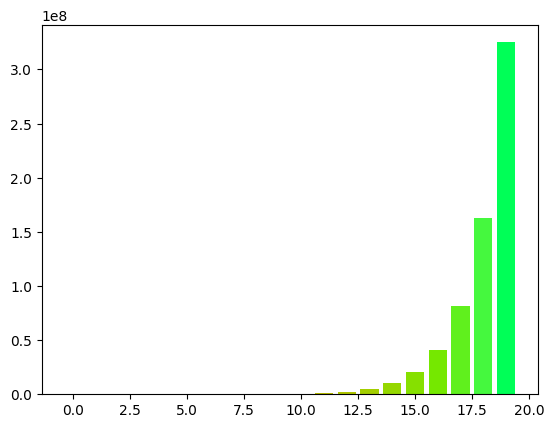

In [217]:
# MORE DEBUGGING STUFFFFFF
import matplotlib.pyplot as plt

rgb_range = [65367, 4585534, 6352925, 7727104, 8839168, 
             9819904, 10735104, 11453696, 12106752, 12759552, 
             13346816, 13868544, 14390016, 14845696, 15366400, 
             15821312, 16145152, 16402432, 16593152, 16711680]

hex_range = ['#00ff57', '#45f83e', '#60f01d', '#75e800', '#86e000', '#95d700', '#a3ce00', '#aec500', '#b8bc00', '#c2b200', '#cba800', '#d39e00', '#db9300', '#e28700', '#ea7900', '#f16a00', '#f65b00', '#fa4800', '#fd3100', '#ff0000']
hex_range.reverse()

plt.bar([i for i in range(len(price_color_thresholds))], sorted(price_color_thresholds), color=hex_range)
plt.title("")
plt.show()



In [218]:
#DEBUGGING LALALALA

string = """#00ff57
#45f83e
#60f01d
#75e800
#86e000
#95d700
#a3ce00
#aec500
#b8bc00
#c2b200
#cba800
#d39e00
#db9300
#e28700
#ea7900
#f16a00
#f65b00
#fa4800
#fd3100
#ff0000"""

list = string.split("\n")
print(list)

list_new = [int(list[i][1:], 16) for i in range(len(list))]
print(list_new)

['#00ff57', '#45f83e', '#60f01d', '#75e800', '#86e000', '#95d700', '#a3ce00', '#aec500', '#b8bc00', '#c2b200', '#cba800', '#d39e00', '#db9300', '#e28700', '#ea7900', '#f16a00', '#f65b00', '#fa4800', '#fd3100', '#ff0000']
[65367, 4585534, 6352925, 7727104, 8839168, 9819904, 10735104, 11453696, 12106752, 12759552, 13346816, 13868544, 14390016, 14845696, 15366400, 15821312, 16145152, 16402432, 16593152, 16711680]


# Making the Vaults and Notes (aka the FUN part!!!)

1. Make vaults
2. Generate notes that link vaults
3. Figure out the details later???!!!

In [219]:
def create_big_vault(PATH_TO_VAULTS, VAULT_NAME, money_spent_dict):
    """ Creates and populates the upper level vault with notes corresponding to each company.
    Each of these company notes will link to another vault that has specific 
    information about the company and who they gave money to. The main note in 
    this vault will have a summary of the total money spent and the number of transactions. """
    
    # Create the vault
    VAULT_PATH = make_vault(PATH_TO_VAULTS, VAULT_NAME)

    # Create the main note in the vault
    sum_of_transactions = 0
    number_of_transactions = 0
    recipients = set() # cool beans, I've never used a set before but it seems pretty handy for counting unique stuff
    payment_totals = [] # for generating the range of money values companies spend
    for company, recip_dict in money_spent_dict.items():
        # The line below is messy... for every company it adds the amount they spent to payment_totals
        payment_totals.append(math.fsum([math.fsum(payments) for payments in recip_dict.values()]))
        for recipient, payments in recip_dict.items():
            sum_of_transactions += math.fsum(payments)
            number_of_transactions += len(payments)
            recipients.add(recipient)
    
    main_note_path = os.path.join(VAULT_PATH, "Summary.md")
    main_note_file = open(main_note_path, "w")
    transactions = f"2024 Total Transactions Value: ${round(sum_of_transactions, 2):,} \n\n"
    num_transactions = f"Number of Transactions: {number_of_transactions:,} \n\n"
    num_companies = f"Number of Companies: {len(money_spent_dict):,} \n\n"
    num_recipients = f"Number of Recipients: {len(recipients):,}"
    color_tag = f"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n#c{int("00FFEE", 16)}\n\n"
    size_prop = """---\nnode_size: "100"\n---"""
    note_contents = f"# 2024 Medical Payments Summary: \n\n" + transactions + num_transactions + num_companies + num_recipients + color_tag + size_prop
    main_note_file.write(note_contents)
    main_note_file.close()


    # Get range for max and min spending
    max_spending, min_spending = max(payment_totals), min(payment_totals)
    rgb_range = [65367, 4585534, 6352925, 7727104, 8839168, 
            9819904, 10735104, 11453696, 12106752, 12759552, 
            13346816, 13868544, 14390016, 14845696, 15366400, 
            15821312, 16145152, 16402432, 16593152, 16711680]
    steps = len(rgb_range)
    # I'm doing my colors based on a logarithmic scale because the distribution is so wonky
    price_thresholds = [min_spending * (max_spending / min_spending) ** (i/steps) for i in range(steps)]


    # Create a note for each company
    for company, recip_dict in money_spent_dict.items():
        payment_sum = math.fsum([math.fsum(payment_list) for payment_list in recip_dict.values()])
        color = 16711680
        size = 40
        for i in range(len(price_thresholds) - 1):
            if payment_sum >= price_thresholds[i] and payment_sum <= price_thresholds[i + 1]:
                color = rgb_range[i]
                size = i * 2
        company_note_path = os.path.join(VAULT_PATH, f"{company}.md")
        company_note_file = open(company_note_path, "w")
        vault_link = f"[Link to **{company}** Specific Graphic](<obsidian://open?vault={company}>) \n\n"
        payment_sum_str = f"Sum of 2024 Payments: ${payment_sum:,} \n\n"
        payment_number = f"Number of Payments: {int(math.fsum([len(payment_list) for payment_list in recip_dict.values()])):,} \n\n"
        main_note_link = "[[Summary]]"
        color_tag = f"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n#c{color}\n\n"
        size_prop = f"""---\nnode_size: "{size}"\n---"""
        note_contents = vault_link + payment_sum_str + payment_number + main_note_link + color_tag + size_prop
        company_note_file.write(note_contents)
        #
        # FINISH THIS LATER
        # Check note statistics for errors (I bet there are some calculations that got messed up)
        #
    
    return sum_of_transactions

In [ ]:
def create_sub_vaults(PATH_TO_SUB_VAULTS, money_spent_dict):
    """ Creates and populates each company's vault with notes corresponding to each recipient entity.
    Each of these recipient notes will have the total amount of money spent on them and 
    the number of transactions. """

    os.makedirs(PATH_TO_SUB_VAULTS, exist_ok=True)

    # Create a sub vault for each pharma company
    for company, recip_dict in money_spent_dict.items():
        VAULT_PATH = make_vault(PATH_TO_SUB_VAULTS, company)

        # Consolidate required data to generate notes
        sum_of_transactions = 0
        number_of_transactions = 0
        payment_totals = [] # for generating the range of money values different recipients got
        for payments in recip_dict.values():
            sum_of_transactions += math.fsum(payments)
            number_of_transactions += len(payments)
            payment_totals.append(math.fsum(payments))


        # Main summary note
        main_note_path = os.path.join(VAULT_PATH, f"{company}_Summary.md")
        main_note_file = open(main_note_path, "w")
        transactions = f"2024 Total Transactions Value: ${sum_of_transactions:,} \n\n"
        num_transactions = f"Number of Transactions: {number_of_transactions:,} \n\n"
        num_recipients = f"Number of Recipients: {len(recip_dict):,}\n"
        vault_link = f"Go Back to [Main Graph](<obsidian://open?vault=Healthcare_2024>) \n\n"
        color_tag = f"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n#c{int("00FFEE", 16)}\n\n"
        size_prop = """---\nnode_size: "100"\n---"""
        note_contents = f"# 2024 **{company}** Payments Summary: \n\n" + transactions + num_transactions + num_recipients + vault_link + color_tag + size_prop
        main_note_file.write(note_contents)
        main_note_file.close()
        

        # Get range for max and min spending
        max_spending, min_spending = max(payment_totals), min(payment_totals)
        rgb_range = [65367, 4585534, 6352925, 7727104, 8839168, 
                9819904, 10735104, 11453696, 12106752, 12759552, 
                13346816, 13868544, 14390016, 14845696, 15366400, 
                15821312, 16145152, 16402432, 16593152, 16711680]
        steps = len(rgb_range)
        # I'm doing my colors based on a logarithmic scale because the distribution is so wonky
        price_thresholds = [min_spending * (max_spending / min_spending) ** (i/steps) for i in range(steps)]
        

        # Populate sub vaults with notes
        for recipient, payments in recip_dict.items():
            payment_sum = round(math.fsum(payments),2)
            color = 16711680
            size = 40
            for i in range(len(price_thresholds) - 1):
                if payment_sum >= price_thresholds[i] and payment_sum <= price_thresholds[i + 1]:
                    color = rgb_range[i]
                    size = i * 2
            recipient_note_path = os.path.join(VAULT_PATH, f"{recipient}.md")
            recipient_note_file = open(recipient_note_path, "w")
            summary = f"### Summary of **{company}** Payments to **{recipient}**\n\n"
            payment_sum = f"Total Money Received: ${payment_sum:,}\n\n"
            payment_number = f"Number of Payments Received: {len(payments):,}\n\n"
            main_note_link = f"Go Back to [[{company}_Summary]]\n\n"
            vault_link = f"Go Back to [Main Graph](<obsidian://open?vault=Healthcare_2024>) \n\n"
            color_tag = f"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n#c{color}\n\n"
            size_prop = f"""---\nnode_size: "{size}"\n---"""
            note_contents = summary + payment_sum + payment_number + main_note_link + vault_link + color_tag + size_prop
            recipient_note_file.write(note_contents)
            recipient_note_file.close()
    
    return 0

In [221]:
total_money = create_big_vault(PATH_TO_VAULTS, "Healthcare_2024", money_spent)
print(total_money)

6725488754.549984


In [222]:
create_sub_vaults(os.path.join(PATH_TO_VAULTS, "Healthcare_2024_Sub_Vaults"), money_spent)

0